In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Loss
*The Dual Lagrangian loss function which we are trying to maximize is: Ldual = ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)*
### Gradient
*Differentiating the loss wrt αk , using kth term for Gradient Ascent:*

*δLdual/δαk = 1 – yk ∑ αj yj K(xj, xk)*

*where,*

*K(xi, xj) is our Kernal function which could be linear, polynomial or gaussian(rbf).*

### Updates
*α = α + η*(gradient)*

*where η = learning rate*

*After training, calculate intercept b:*

*b = avgC≤αi≤0 { yi – ∑αjyj K(xj, xi) }*

*Prediction*
*For α>0 :*

*y^ = sign( ∑ αiyi k(xi, xi)+b)*   


*Polynomial = (c + X.y)degree*

*Gaussian = e -(1/ σ2) ||X-y|| 2 </sup>*

In [33]:
class SVM_Dual:
    def __init__(self, kernel='poly', degree=2, sigma=0.1, epochs=1000, learning_rate=0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epochs = epochs
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernel  # for polynomial kernel
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernel  # for Gaussian (RBF) kernel

    def polynomial_kernel(self, x1, x2):
        return (self.c + x1.dot(x2.T)) ** self.degree  # (c + x1 @ x2.T)^degree

    def gaussian_kernel(self, x1, x2):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(x1[:, np.newaxis] - x2[np.newaxis, :], axis=2) ** 2)

    def fit(self, x, y):
        self.X = x
        self.y = y
        self.alpha = np.random.random(x.shape[0])
        self.b = 0
        self.ones = np.ones(x.shape[0])

        y_mul_kernel = np.outer(y, y) * self.kernel(x, x)  # yi * yj * K(xi, xj)

        for _ in range(self.epochs):
            gradient = self.ones - y_mul_kernel.dot(self.alpha)  # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient  # α = α + η*(1 – yk ∑ αj yj K(xj, xk))
            self.alpha = np.clip(self.alpha, 0, self.C)  # Clip alpha values to be within [0, C]

            # loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernel)  # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)

        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        # print(alpha_index)

        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(x, x[index])))

        self.b = np.mean(b_list)  # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }

    def predict(self, x):
        return np.sign(self.decision_function(x))

    def score(self, x, y):
        y_hat = self.predict(x)
        return np.mean(y == y_hat)

    def decision_function(self, x):
        return (self.alpha * self.y).dot(self.kernel(self.X, x)) + self.b

    
    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=0.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()
        

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


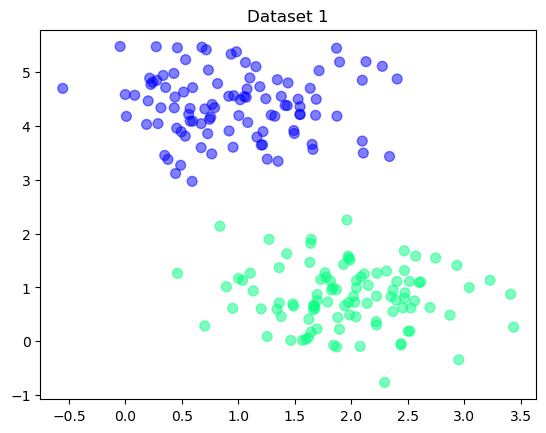

In [16]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

Accuracy:  1.0


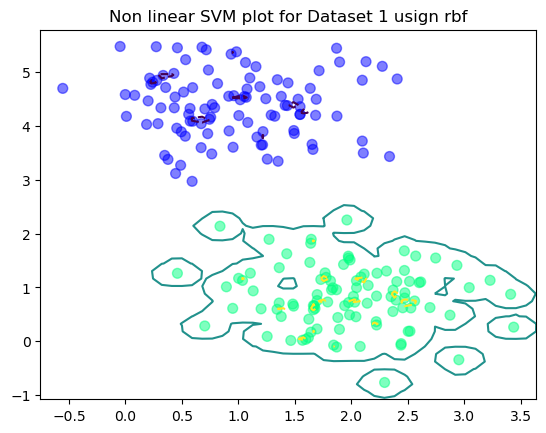

In [34]:
#dataset 1, using gaussian
svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.fit(X1,y1)
print("Accuracy: ", svm_dual1.score(X1,y1))
svm_dual1.plot('Non linear SVM plot for Dataset 1 usign rbf')

First five rows and col values 
X2 : 
 [[ 0.81429778  0.63223398]
 [ 0.17661402 -0.07545674]
 [ 0.93189465  0.20404881]
 [-0.09199659  0.90197004]
 [ 0.36460986 -0.26669169]]  
 y2 :
 [ 1  1  1  1 -1]


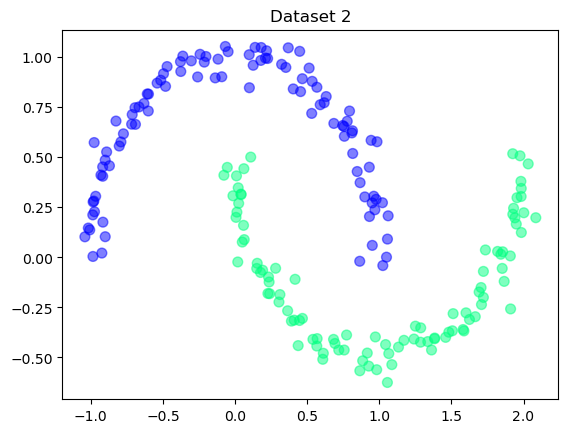

In [18]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

Accuracy:  1.0


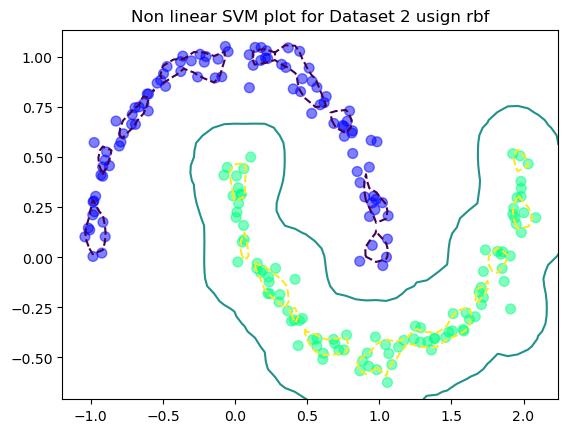

In [20]:
#dataset 2, using gaussian
svm_dual2 = SVM_Dual(kernel = 'rbf')
svm_dual2.fit(X2,y2)
print("Accuracy: ", svm_dual2.score(X2,y2))
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')